In [1]:
import pandas as pd
import numpy as np

# seaborn - for visualization
import seaborn as sns
COLORS = sns.color_palette()

%matplotlib inline

### checking columns
- checking columns attribute
- columns
    - invoiceNo: ordered Number
    - StockCode: item id
    - Description: product descrition
    - Quantity: product quantity
    - InvoiceDate: ordered date
    - UnitPrice: product price
    - CustomerID: 
    - Country: client living country

### data loading
- 1. use filteredData (OnlineRetailFiltered.csv)

In [2]:
df = pd.read_csv('OnlineRetailFiltered.csv')
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,536365,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,536365,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,536365,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,536365,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,536365,United Kingdom,20.34


In [3]:
del df['Unnamed: 0'] # filter out the unnecessary
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,536365,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,536365,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,536365,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,536365,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,536365,United Kingdom,20.34


### convert date type
- better for date/datetime type to use analysis than string type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
InvoiceNo      397884 non-null int64
StockCode      397884 non-null object
Description    397884 non-null object
Quantity       397884 non-null int64
InvoiceDate    397884 non-null object
UnitPrice      397884 non-null float64
CustomerID     397884 non-null int64
Country        397884 non-null object
TotalPrice     397884 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 27.3+ MB


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
InvoiceNo      397884 non-null int64
StockCode      397884 non-null object
Description    397884 non-null object
Quantity       397884 non-null int64
InvoiceDate    397884 non-null datetime64[ns]
UnitPrice      397884 non-null float64
CustomerID     397884 non-null int64
Country        397884 non-null object
TotalPrice     397884 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 27.3+ MB


### total sales for certain periods
- total sales
- total sales per country
- total sales per months
- total sales per days
- total sales per times

1. Total revenue

In [6]:
total_revenue = df['TotalPrice'].sum()
total_revenue

8911407.904

2. Total sales per country

In [7]:
total_revenue_by_country = df.groupby('Country').sum()['TotalPrice'].sort_values()
total_revenue_by_country

Country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.359038e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.045044e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.343989e+04
Norway                  3.616544e+04
Japan                   3.7416

[Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'RSA'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'European Community'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'Lebanon'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'Unspecified'),
 Text(0, 0, 'Malta'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'United Kingdom')]

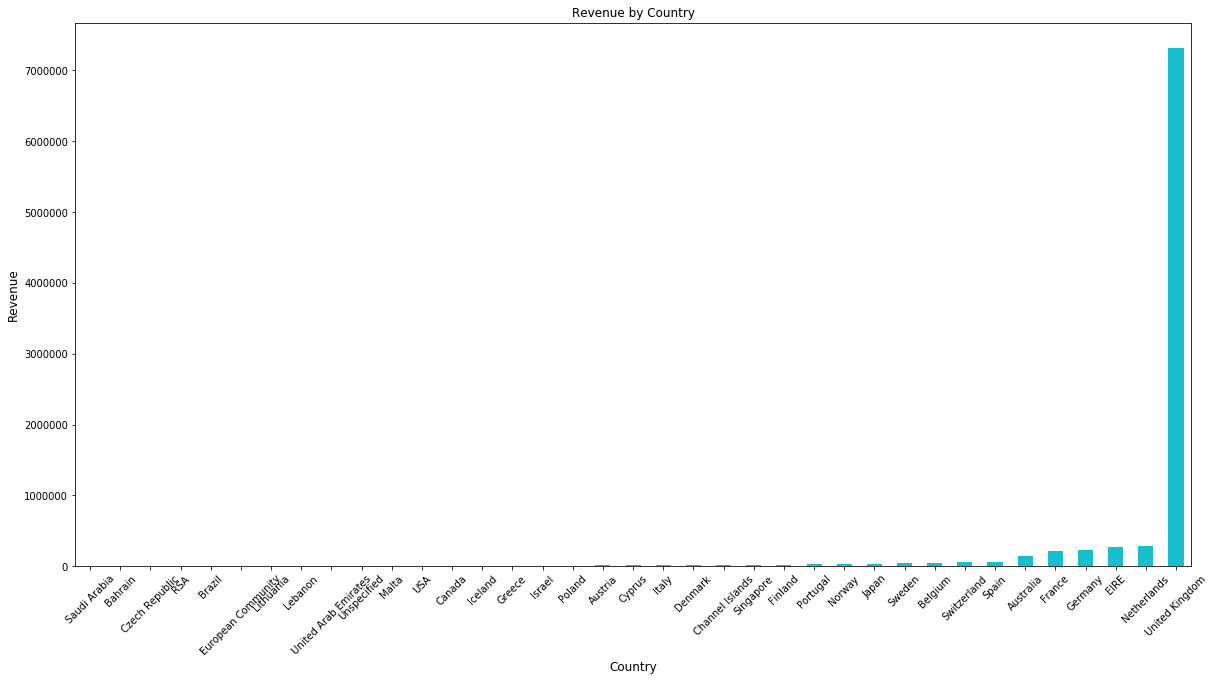

In [8]:
plot = total_revenue_by_country.plot(kind='bar', color = COLORS[-1], figsize = (20, 10))
plot.set_xlabel('Country', fontsize=12)
plot.set_ylabel('Revenue', fontsize=12)
plot.set_title('Revenue by Country', fontsize=12)
plot.set_xticklabels(labels=total_revenue_by_country.index, rotation=45)

In [9]:
(total_revenue_by_country / total_revenue) * 100 # percentage by countries

Country
Saudi Arabia             0.001637
Bahrain                  0.006154
Czech Republic           0.009277
RSA                      0.011247
Brazil                   0.012833
European Community       0.014591
Lithuania                0.018640
Lebanon                  0.019008
United Arab Emirates     0.021347
Unspecified              0.029929
Malta                    0.030585
USA                      0.040178
Canada                   0.041143
Iceland                  0.048365
Greece                   0.053421
Israel                   0.081039
Poland                   0.082306
Austria                  0.114445
Cyprus                   0.152505
Italy                    0.196189
Denmark                  0.212709
Channel Islands          0.229486
Singapore                0.238787
Finland                  0.253002
Portugal                 0.375248
Norway                   0.405833
Japan                    0.419870
Sweden                   0.430665
Belgium                  0.462288
Switze

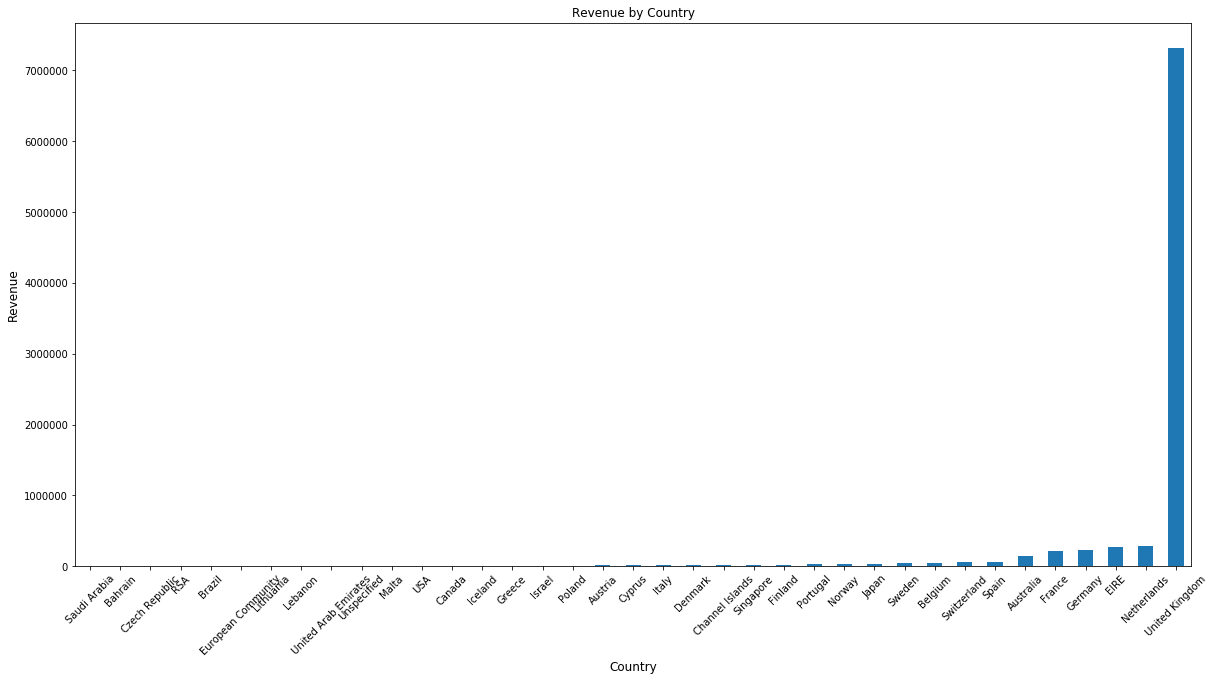

In [10]:
# graph util function
def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20,10), rotation=45):
    plot = df.plot(kind='bar', color = color, figsize = figsize)
    plot.set_xlabel(xlabel, fontsize=12)
    plot.set_ylabel(ylabel, fontsize=12)
    plot.set_title(title, fontsize=12)
    plot.set_xticklabels(labels=df.index, rotation=rotation)
    
plot_bar(total_revenue_by_country, 'Country', 'Revenue', 'Revenue by Country')

3. total sales per months

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,536365,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,536365,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,536365,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,536365,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,536365,United Kingdom,20.34


In [12]:
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month

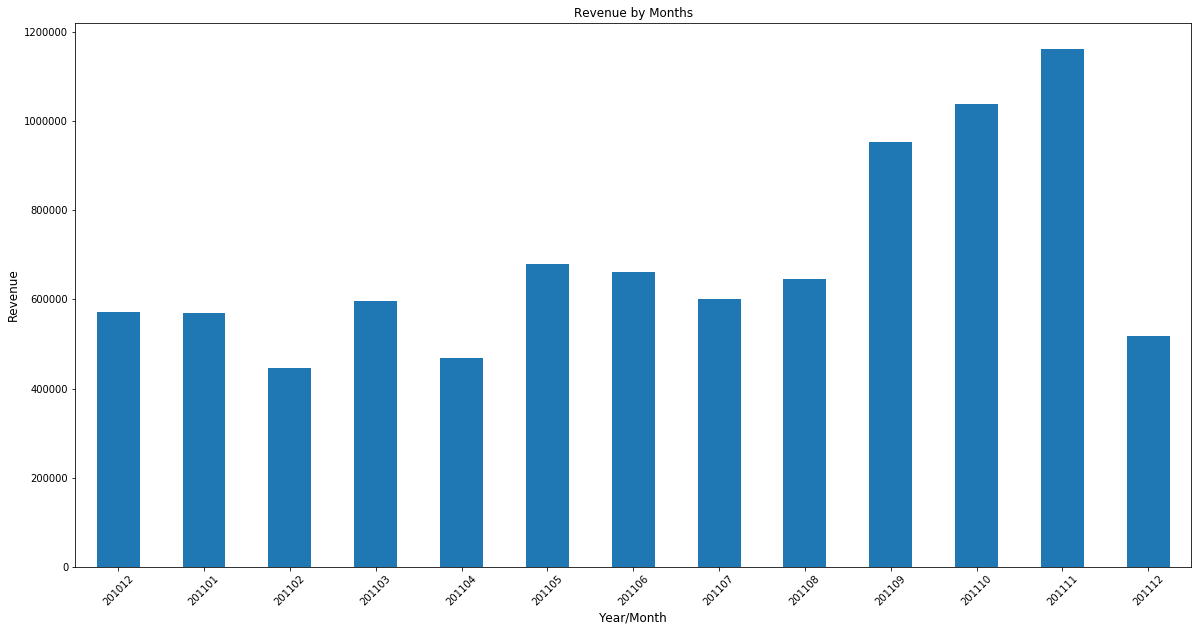

In [13]:
revenue_by_month = df.set_index('InvoiceDate').groupby(extract_month).sum()['TotalPrice']
revenue_by_month

plot_bar(revenue_by_month, 'Year/Month', 'Revenue', 'Revenue by Months')

In [14]:
df['InvoiceDate'].sort_values(ascending=False) # checking most recent date in data

397883   2011-12-09 12:50:00
397875   2011-12-09 12:50:00
397882   2011-12-09 12:50:00
397870   2011-12-09 12:50:00
397871   2011-12-09 12:50:00
                 ...        
4        2010-12-01 08:26:00
3        2010-12-01 08:26:00
2        2010-12-01 08:26:00
1        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

4. total sales per days


In [15]:
revenue_by_days = df.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['TotalPrice']
revenue_by_days

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: TotalPrice, dtype: float64

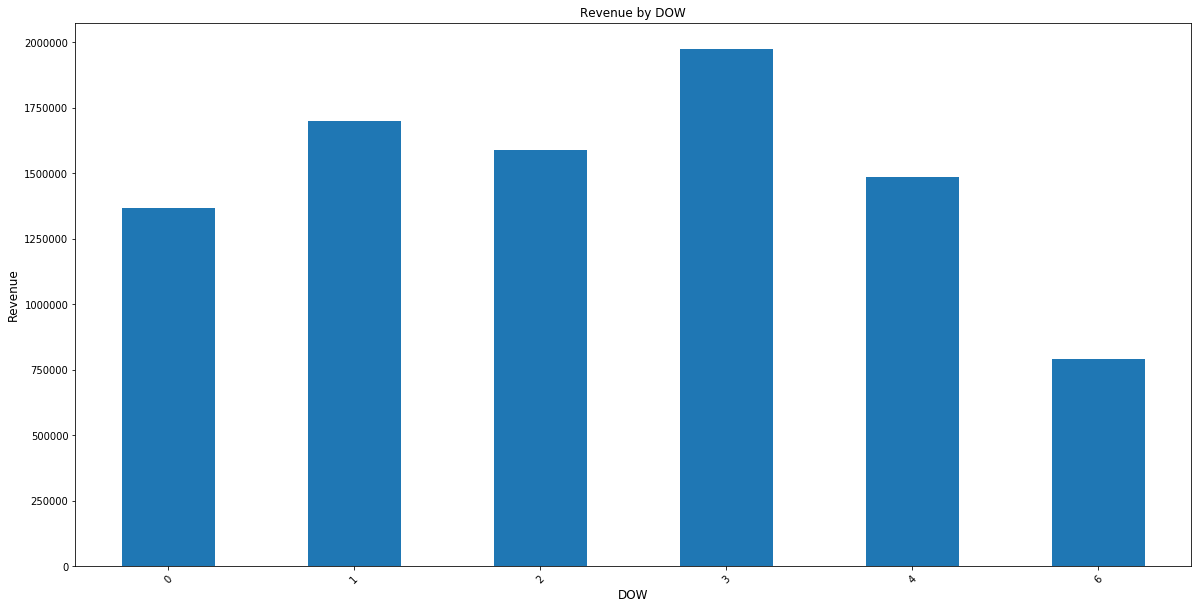

In [16]:
plot_bar(revenue_by_days, 'DOW', 'Revenue', 'Revenue by DOW')

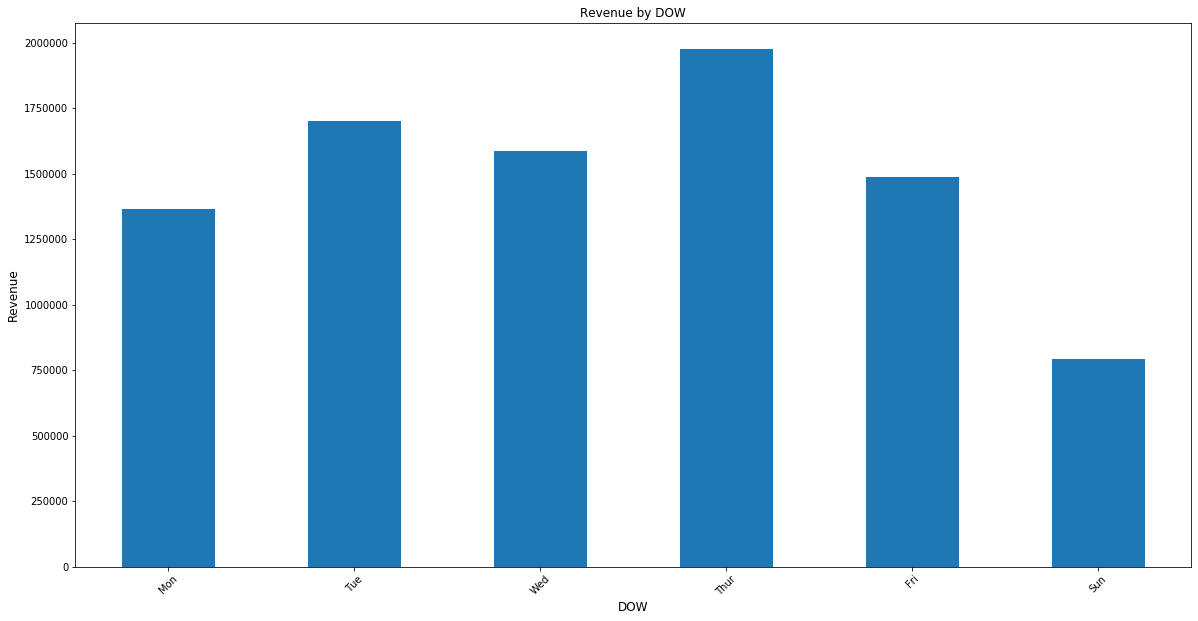

In [17]:
Day_of_Week = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
revenue_by_days.index = Day_of_Week[revenue_by_days.index]
plot_bar(revenue_by_days, 'DOW', 'Revenue', 'Revenue by DOW')

5. total sales per times

In [18]:
revenue_by_hours = df.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['TotalPrice']
revenue_by_hours

6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: TotalPrice, dtype: float64

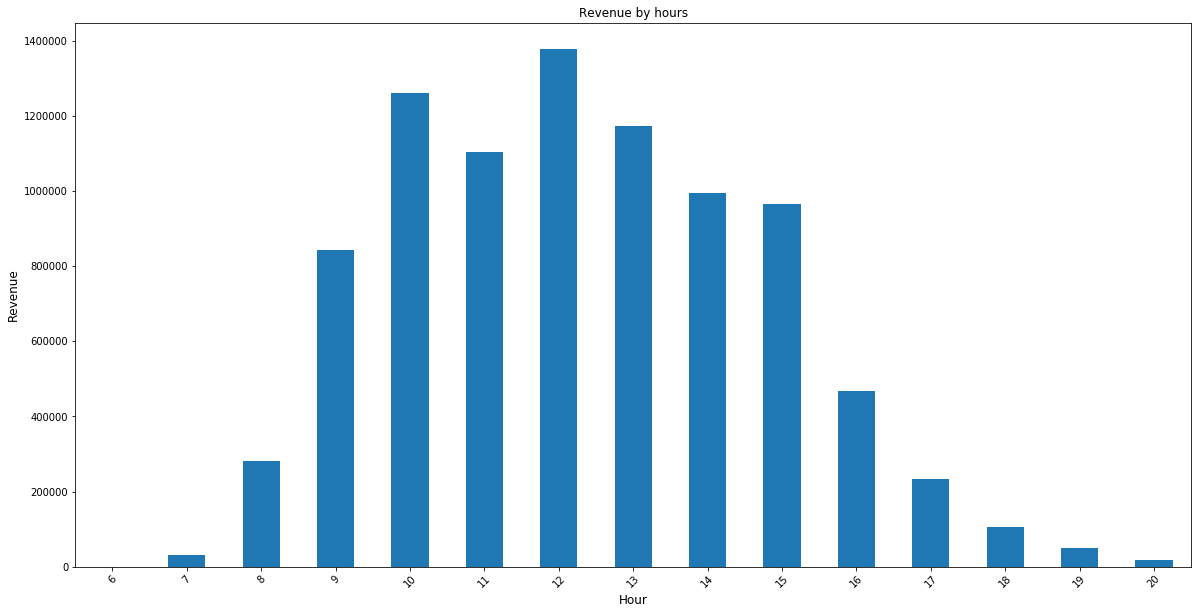

In [19]:
plot_bar(revenue_by_hours, 'Hour', 'Revenue', 'Revenue by hours')

#### sales insight based on data
- 82% of total revenue was occured in UK
- November in 2011 was the highest number of orders. 
    - November and December were the dominated in sales (due to Black Friday, Cyber Monday, and Christmas)
- During the weekdays, number of orders were increasing until Thusday, and went down (no orders on Saturday)
- Order starts from at 7 in the morning and increases until noon, and starts to decrease until 15PM, and drastically goes down until 20PM.

metrics per products
- top 10 sold items
- top 10 sales items

In [31]:
top_seling = df.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:3]
top_seling

StockCode
23843    80995
23166    77916
84077    54415
Name: Quantity, dtype: int64

In [27]:
top_sold_item_revenue = df.groupby('StockCode').sum()['TotalPrice'].sort_values(ascending=False)[:3]
top_sold_item_revenue

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
Name: TotalPrice, dtype: float64

### top 3 sold items sales volume per months

In [34]:
monthly_top3 = df.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'TotalPrice']].loc[top_seling.index]

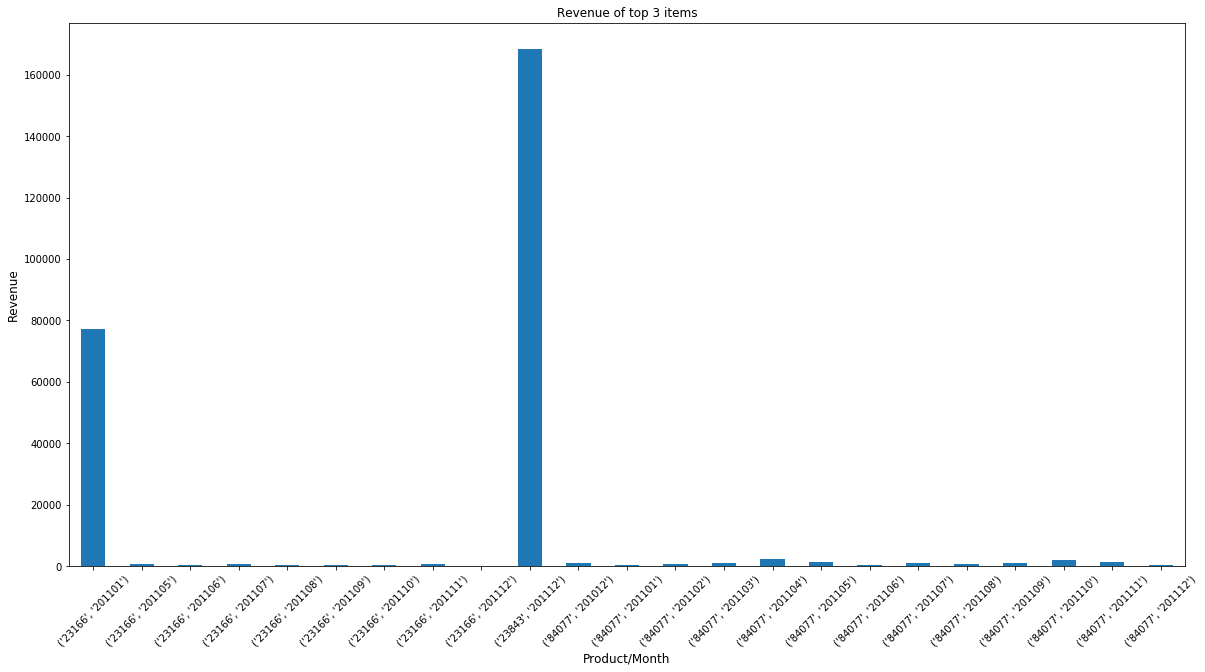

In [35]:
plot_bar(monthly_top3['TotalPrice'], 'Product/Month', 'Revenue', 'Revenue of top 3 items')